In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 定义装饰器函数
def plt_decorator(func):
    def wrapper(*args, **kwargs):
        fig, ax = plt.subplots()
        result = func(ax, *args, **kwargs)
        ax.set_aspect('equal')
        plt.title(kwargs.get('title', ''))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()
        return result
    return wrapper

In [7]:

# 创建一个空的图
G = nx.Graph()

# 添加房间节点
rooms = ['Living Room', 'Kitchen', 'Bedroom 1', 'Bedroom 2', 'Bathroom', 'Dining Room']
G.add_nodes_from(rooms)

# 添加连接边
connections = [('Living Room', 'Kitchen'),
               ('Living Room', 'Bedroom 1'),
               ('Living Room', 'Bedroom 2'),
               ('Living Room', 'Bathroom'),
               ('Living Room', 'Dining Room'),
               ('Kitchen', 'Dining Room'),
               ('Bedroom 1', 'Bathroom'),
               ('Bedroom 2', 'Bathroom')]

G.add_edges_from(connections)

In [8]:
pos = nx.spring_layout(G)  # 定义节点位置
pos

{'Living Room': array([0.02165036, 0.05190735]),
 'Kitchen': array([0.08366036, 1.        ]),
 'Bedroom 1': array([-0.84187185, -0.27626149]),
 'Bedroom 2': array([ 0.37721478, -0.79855263]),
 'Bathroom': array([-0.308074  , -0.72403215]),
 'Dining Room': array([0.66742034, 0.74693892])}

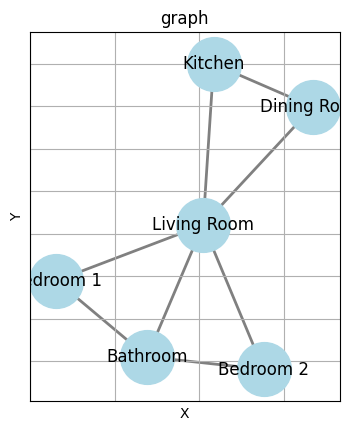

In [9]:
@plt_decorator
def draw_graph(ax, *args, **kwargs):
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
    nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
    nx.draw_networkx_edges(G, pos, edgelist=connections, edge_color='gray', width=2)

draw_graph(title="graph")

In [10]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString

# 创建 L 形多边形的顶点坐标
point1 = Point(1, 1)
point2 = Point(1, 3)
point3 = Point(3, 3)
point4 = Point(3, 5)
point5 = Point(1, 5)

# 创建 L 形多边形的边界线
line1 = LineString([point1, point2, point3, point4, point5])

# 使用 shapely 的 buffer 方法创建 L 形多边形
l_shape_polygon = line1.buffer(0.2, join_style=1)


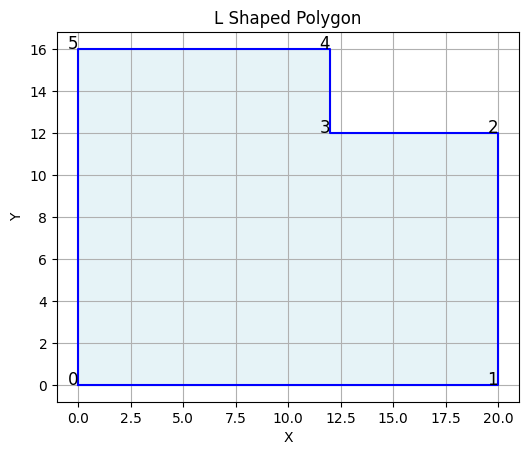

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 定义 L 形多边形的顶点坐标
vertices = np.array([[0, 0], [20, 0], [20, 12], [12, 12], [12, 16], [0, 16]])

# 创建一个新数组，将第一个顶点添加到末尾以形成闭合多边形
vertices_closed = np.vstack([vertices, vertices[0]])



# 使用装饰器包裹绘制函数
@plt_decorator
def draw_polygon(ax, *args, **kwargs):
    ax.plot(vertices_closed[:, 0], vertices_closed[:, 1], 'b-')
    ax.fill(vertices_closed[:, 0], vertices_closed[:, 1], alpha=0.3, color='lightblue')
    # 标注每个顶点的序号
    for i, (x, y) in enumerate(vertices):
        ax.text(x, y, f'{i}', fontsize=12, ha='right')

draw_polygon(title="L Shaped Polygon")

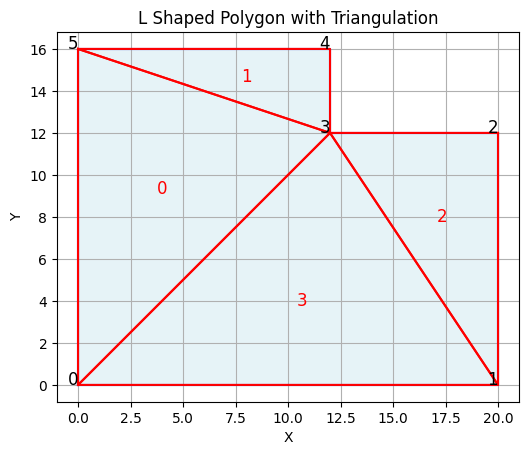

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from shapely.ops import triangulate

# 定义 L 形多边形的顶点坐标
vertices = np.array([[0, 0], [20, 0], [20, 12], [12, 12], [12, 16], [0, 16]])

# 创建多边形对象
polygon = Polygon(vertices)

# 进行三角剖分
triangles = list(triangulate(polygon))

# 用来存放在多边形内部的三角形
valid_triangles = []

# 检查每个三角形是否在多边形内部
for triangle in triangles:
    # 计算三角形的重心
    centroid = triangle.centroid

    # 如果重心在多边形内部，则保留该三角形
    if polygon.contains(centroid):
        valid_triangles.append(triangle)

@plt_decorator
def draw_polygon_with_triangles(ax, *args, **kwargs):
    # 绘制闭合多边形
    ax.plot(vertices_closed[:, 0], vertices_closed[:, 1], 'b-')
    ax.fill(vertices_closed[:, 0], vertices_closed[:, 1], alpha=0.3, color='lightblue')
    # 标注每个顶点的序号
    for i, (x, y) in enumerate(vertices):
        ax.text(x, y, f'{i}', fontsize=12, ha='right')
    # 绘制有效三角形
    for i, triangle in enumerate(valid_triangles):
        ax.plot(*triangle.exterior.xy, 'r-')
        # 标注三角形的序号
        centroid = triangle.centroid
        ax.text(centroid.x, centroid.y, f'{i}', fontsize=12, ha='center', va='center', color='red')

draw_polygon_with_triangles(title="L Shaped Polygon with Triangulation")

In [13]:
valid_triangles

[<POLYGON ((0 16, 0 0, 12 12, 0 16))>,
 <POLYGON ((0 16, 12 12, 12 16, 0 16))>,
 <POLYGON ((20 12, 12 12, 20 0, 20 12))>,
 <POLYGON ((0 0, 20 0, 12 12, 0 0))>]

In [14]:

vertex_indices = np.empty((len(valid_triangles), 3), dtype=np.int32)
for i in range(len(valid_triangles)):
    triangle_coords = np.array(valid_triangles[i].exterior.coords)[:3, :]
    vertex_indices[i] = np.array([np.where((vertices == vertex).all(axis=1))[0][0] for vertex in triangle_coords])
vertex_indices

array([[5, 0, 3],
       [5, 3, 4],
       [2, 3, 1],
       [0, 1, 3]])

In [15]:
segment_lengths = np.empty((len(vertices), ), dtype=np.float32)
for i in range(len(vertices)):
    length = np.linalg.norm(vertices[(i + 1) % len(vertices)] - vertices[i])
    segment_lengths[i] = length
segment_lengths

array([20., 12.,  8.,  4., 12., 16.], dtype=float32)

In [16]:
# 计算累加值
cumulative_lengths = np.cumsum(segment_lengths)
cumulative_lengths

array([20., 32., 40., 44., 56., 72.], dtype=float32)

In [17]:
percent_lengths = cumulative_lengths / np.max(cumulative_lengths)
percent_lengths

array([0.2777778 , 0.44444445, 0.5555556 , 0.6111111 , 0.7777778 ,
       1.        ], dtype=float32)